# Waveform exploration

This notebook aims to explore waveforms

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:

waveID = "SXS:BBH:1361" # "SXS:BBH:0211"
data_path = "../../../data/input/case_3/"

Matrix shape (14495, 2)
Initial time:  -108.17541107830712
Final time:  3197.294652982499
Matrix shape (7974, 2)
Initial time:  2301.764955731359
Final time:  3045.4141661542835


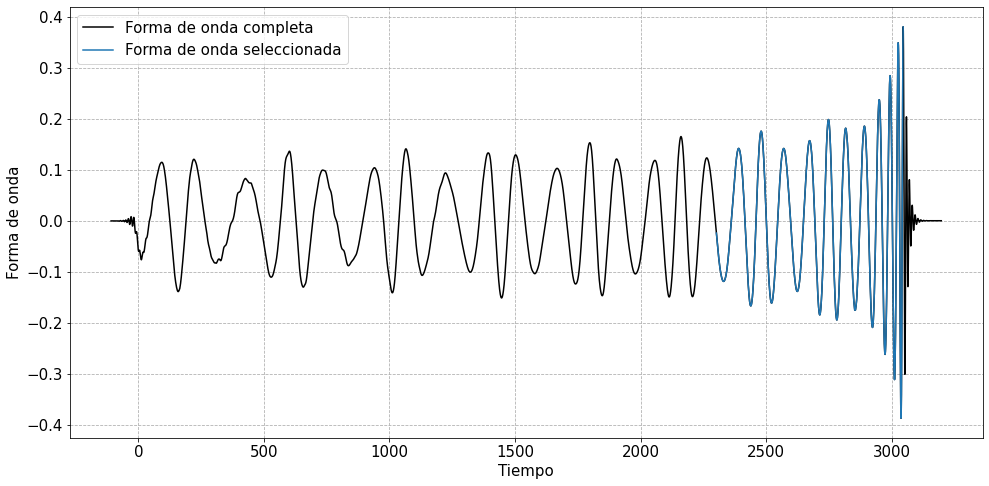

In [16]:


wf = pd.read_csv(data_path + waveID + "/waveform_real.txt", sep=" ", names=["time", "wf"])

print('Matrix shape', wf.shape)
print('Initial time: ', wf['time'][0])
print('Final time: ', wf['time'].iloc[-1])

sns.set_context(rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})

fig, ax = plt.subplots(1,1, figsize=(14,7))

# eliminate first ~30% of data
low_lim = np.round(wf.shape[0] * 0.345)
up_lim = wf['wf'].argmax()
wf_short = wf[(wf.index > low_lim) & (wf.index < up_lim)]

print('Matrix shape', wf_short.shape)
print('Initial time: ', wf_short['time'].iloc[0])
print('Final time: ', wf_short['time'].iloc[-1])

# sns.lineplot(data=wf, x="time", y="wf", color="k")
ax.plot(wf['time'], wf['wf'], "k-", label="Forma de onda completa");
ax.set_xlabel('Tiempo')
ax.set_ylabel('Forma de onda')
ax.plot(wf_short['time'], wf_short['wf'], label="Forma de onda seleccionada");
plt.grid(linestyle="dashed")
plt.legend()
plt.tight_layout()

fig.savefig(data_path + "example_wf_section.png")
fig.savefig(data_path + "example_wf_section.pdf")